# Comparison of two records

In [1]:
#from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

import functionsMasterProjectMeinhart as fmpm

%matplotlib nbagg
#%matplotlib notebook
#%matplotlib inline

# If warning appears:
# Widget Javascript not detected.  It may not be installed or enabled properly.
# execute --> jupyter nbextension enable --py --sys-prefix widgetsnbextension

<IPython.core.display.Javascript object>


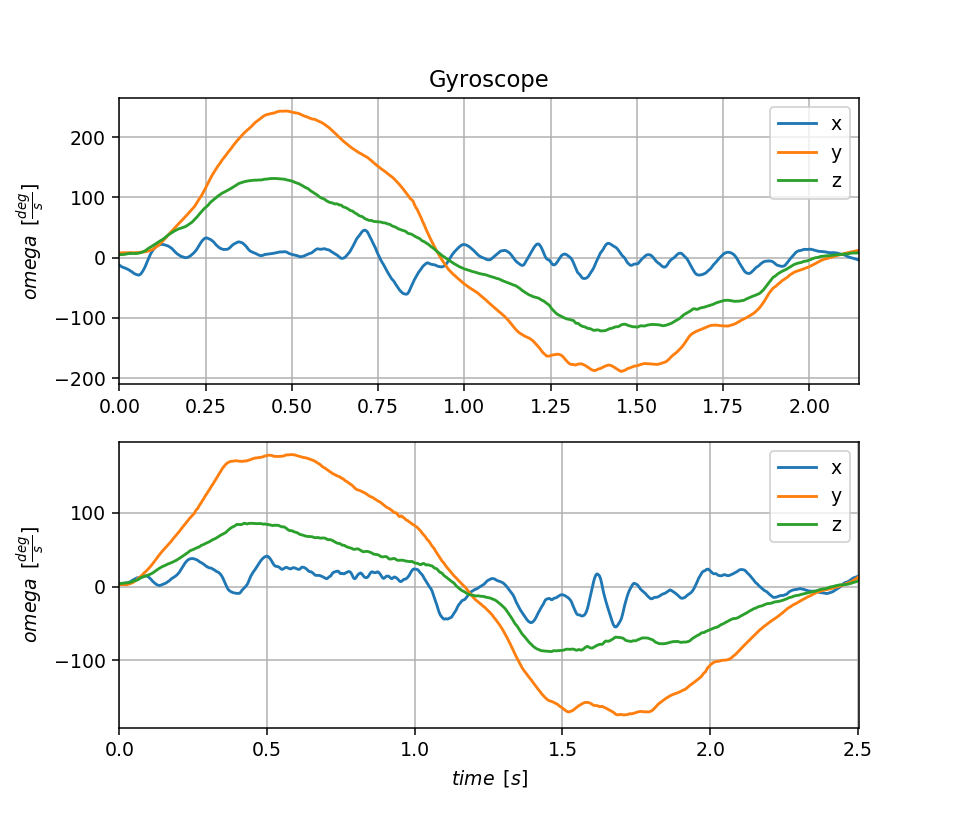

In [2]:
fig1, ax1 = plt.subplots(2, 1, figsize=(7,6), sharex=False, num='Comparison of two records')
#plt.subplots_adjust(hspace=0.4)

In [3]:
def plot_signals(sender):
    
    ax1[0].clear()
    ax1[1].clear()
    signal = signal_buttons.value
    
    try:
        cutoff = float(cutoff_text.value)
        order = int(filtorder_text.value)
 
    except ValueError:
        info_text.value = '-- invalid value at filter properties --'
        return

    
    selected_data_1 = fmpm.get_data_one_rep(subject_number=sub_buttons_1.value,
                                            exercise_abbreviation=exerc_buttons_1.value,
                                            number_repetitions=rep_buttons_1.value,
                                            sequence_number=seq_buttons_1.value,
                                            db_name='DataBase_Pysio.db',
                                            csv_dir='E:\Physio_Data_Split_Exercise_done',
                                            sampling_rate=256,
                                            cutoff=cutoff, 
                                            order=order,
                                            time_offset_for_filter=0.5,
                                            start_time_zero=True)
    
    selected_data_2 = fmpm.get_data_one_rep(subject_number=sub_buttons_2.value,
                                            exercise_abbreviation=exerc_buttons_2.value,
                                            number_repetitions=rep_buttons_2.value,
                                            sequence_number=seq_buttons_2.value,
                                            db_name='DataBase_Pysio.db',
                                            csv_dir='E:\Physio_Data_Split_Exercise_done',
                                            sampling_rate=256,
                                            cutoff=cutoff, 
                                            order=order,
                                            time_offset_for_filter=0.5,
                                            start_time_zero=True)
    
    if selected_data_1:
        
        plt.sca(ax1[0])
        fmpm.plot_signal(selected_data_1[signal],
                         time=selected_data_1['time'],
                         labels=['x','y','z'],
                         colors=['tab:blue','tab:orange','tab:green'],
                         Title='Accelerometer',
                         xLabel=' ',
                         yLabel=r'$acc \enspace [g]$',
                         g_to_ms2=False,
                         legend_loc='upper right')
        
        if signal == 'Gyr':
            ax1[0].set_title('Gyroscope')
            ax1[0].set_ylabel(r'$omega \enspace [\frac{deg}{s}]$')
        elif signal == 'Mag':
            ax1[0].set_title('Magnetometer')
            ax1[0].set_ylabel(r'$mag. flux \enspace [G]$')
        
        ax1[0].set_xlim(selected_data_1['time'][0], selected_data_1['time'][-1])
        
        info_text.value = '-- data 1 loaded --'
        
    else:
        info_text.value = '-- data 1 not available --'
        
    if selected_data_2:
        
        plt.sca(ax1[1])
        fmpm.plot_signal(selected_data_2[signal],
                         time=selected_data_2['time'],
                         labels=['x','y','z'],
                         colors=['tab:blue','tab:orange','tab:green'],
                         Title=' ',
                         xLabel=r'$time \enspace [s]$',
                         yLabel=r'$acc \enspace [g]$',
                         g_to_ms2=False,
                         legend_loc='upper right')
        
        if signal == 'Gyr':
            ax1[1].set_ylabel(r'$omega \enspace [\frac{deg}{s}]$')
        elif signal == 'Mag':
            ax1[1].set_ylabel(r'$mag. flux \enspace [G]$')
        
        ax1[1].set_xlim(selected_data_2['time'][0], selected_data_2['time'][-1])
        
        info_text.value = info_text.value + ' data 2 loaded --'
        
    else:
        info_text.value = info_text.value + ' data 2 not available --'
    
    plt.show()
    
    # plot features and cross-correlation only if corresponding check box is clicked
    if enable_feature_plot.value:
        
        global selected_data

        # showing the plot is faster when first making a local variable
        selected_data = [selected_data_1, selected_data_2]

        # show also features and normalized cross-correlation
        plot_sections_and_crosscorr(0)


In [4]:
list_subject_nums = [1,2,3,4,5,6,7,8,9,10]
list_paradigm_abbrs = ['RF','RO','RS','LR','BC','TC','MP','SA','P1','P2']
list_repetitions = [5,10,15]
list_sequence_nums = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

style01 = {'description_width': 'initial'}
layout01 = {'width': '150px'}

sub_buttons_1 = widgets.Dropdown(
    options=list_subject_nums,
    value=list_subject_nums[0],
    description='Subject',
    disabled=False,
    layout=layout01,
    style=style01
)

exerc_buttons_1 = widgets.Dropdown(
    options=list_paradigm_abbrs,
    value=list_paradigm_abbrs[0],
    description='Exercise',
    disabled=False,
    layout=layout01,
    style=style01
)

rep_buttons_1 = widgets.Dropdown(
    options=list_repetitions,
    value=list_repetitions[0],
    description='Repetitions',
    disabled=False,
    layout=layout01,
    style=style01
)

seq_buttons_1 = widgets.Dropdown(
    options=list_sequence_nums,
    value=list_sequence_nums[0],
    description='Sequ. Num.',
    disabled=False,
    layout=layout01,
    style=style01
)


sub_buttons_1.observe(plot_signals)
exerc_buttons_1.observe(plot_signals)
rep_buttons_1.observe(plot_signals)
seq_buttons_1.observe(plot_signals)


# box with buttons to select subject, exercise, ...
select_button_box_1 = widgets.VBox([sub_buttons_1, exerc_buttons_1, rep_buttons_1, seq_buttons_1],
                           layout=widgets.Layout(flex='auto', height='auto', width='auto'));



sub_buttons_2 = widgets.Dropdown(
    options=list_subject_nums,
    value=list_subject_nums[0],
    description='Subject',
    disabled=False,
    layout=layout01,
    style=style01
)

exerc_buttons_2 = widgets.Dropdown(
    options=list_paradigm_abbrs,
    value=list_paradigm_abbrs[0],
    description='Exercise',
    disabled=False,
    layout=layout01,
    style=style01
)

rep_buttons_2 = widgets.Dropdown(
    options=list_repetitions,
    value=list_repetitions[0],
    description='Repetitions',
    disabled=False,
    layout=layout01,
    style=style01
)

seq_buttons_2 = widgets.Dropdown(
    options=list_sequence_nums,
    value=list_sequence_nums[0],
    description='Sequ. Num.',
    disabled=False,
    layout=layout01,
    style=style01
)


sub_buttons_2.observe(plot_signals)
exerc_buttons_2.observe(plot_signals)
rep_buttons_2.observe(plot_signals)
seq_buttons_2.observe(plot_signals)


# box with buttons to select subject, exercise, ...
select_button_box_2 = widgets.VBox([sub_buttons_2, exerc_buttons_2, rep_buttons_2, seq_buttons_2],
                           layout=widgets.Layout(flex='auto', height='auto', width='auto'));




# filter properties
cutoff_text = widgets.Text(
    value='10',
    description='cutoff [Hz]',
    disabled=False,
    layout={'width': '150px'}
)

filtorder_text = widgets.Text(
    value='6',
    description='order   ',
    disabled=False,
    layout={'width': '150px'}
)

cutoff_text.on_submit(plot_signals)
filtorder_text.on_submit(plot_signals)


# select signal
signal_buttons = widgets.ToggleButtons(
    options=['Acc', 'Gyr', 'Mag'],
    description='Signal: ',
    disabled=False,
    button_style=''
)
signal_buttons.observe(plot_signals)


# info text
info_text = widgets.Label(value='- info -', layout=widgets.Layout(align_self='center', width='100%'))

# button to enable feature and cross-correlation plotting
enable_feature_plot = widgets.Checkbox(
    value=True,
    disabled=False,
    description='Plot Features',
    layout={'width': '120px'}
)
enable_feature_plot.observe(plot_signals)

In [5]:
display(signal_buttons)

In [6]:
display(info_text)

**Filter properties:**

In [7]:
display(cutoff_text)

ValueError: Digital filter critical frequencies must be 0 < Wn < 1

In [8]:
display(filtorder_text)

**First record:**

In [9]:
display(select_button_box_1)

**Second record:**

In [10]:
display(select_button_box_2)

In [11]:
display(enable_feature_plot)

# Feature generation and normalized cross-correlation

In [12]:
def plot_sections_and_crosscorr(sender):
    ''' 
    Funciton for plotting mean of signal sections as well as 
    normalized cross correlation of the two selected records.
    '''
    
    color = 'b' # color for plotting
    
    # firt clear all axes
    for axs in [axs_acc, axs_gyr, axs_mag]:
        for ii in [0,1,2]:
            for jj in [0,1,2]:
                axs[ii,jj].clear()
                
    # check if input text (number of sections, x-axis ticks) is positive integer
    try:
        num_sec = int(num_sec_text.value)
        x_ticks_step = int(x_ticks_step_text.value)
 
    except ValueError:
        return
    
    # split signals into sections and calculate mean of of each section for both records
    sec_mean = {}

    for ind, rec in zip([0,1], ['rec1', 'rec2']):

        sec_mean[rec] = {}

        # number of data points
        len_data = np.shape(selected_data[ind]['time'])[0]

        # get indices of the sections (+1 due to start and end index of each section)
        sec_indices = np.linspace(0, len_data, num_sec+1)
        sec_indices = [int(i) for i in sec_indices]

        # generate rows with three zeros in order to use np.vstack afterwards
        sec_mean[rec]['Acc.'] = np.array([0,0,0])
        sec_mean[rec]['Gyr.'] = np.array([0,0,0])
        sec_mean[rec]['Mag.'] = np.array([0,0,0])

        # add the mean of each section and signal
        for ii in range(len(sec_indices)-1):
            sec_mean[rec]['Acc.'] = np.vstack((sec_mean[rec]['Acc.'], np.mean(selected_data[ind]['Acc'][sec_indices[ii]:sec_indices[ii+1]], axis=0)))
            sec_mean[rec]['Gyr.'] = np.vstack((sec_mean[rec]['Gyr.'], np.mean(selected_data[ind]['Gyr'][sec_indices[ii]:sec_indices[ii+1]], axis=0)))
            sec_mean[rec]['Mag.'] = np.vstack((sec_mean[rec]['Mag.'], np.mean(selected_data[ind]['Mag'][sec_indices[ii]:sec_indices[ii+1]], axis=0)))

        # delete the first row with the zeros
        sec_mean[rec]['Acc.'] = np.delete(sec_mean[rec]['Acc.'] , 0, axis=0)
        sec_mean[rec]['Gyr.'] = np.delete(sec_mean[rec]['Gyr.'], 0, axis=0)
        sec_mean[rec]['Mag.'] = np.delete(sec_mean[rec]['Mag.'], 0, axis=0)
    
    # plotting
    for signal, axs in zip(['Acc.','Gyr.','Mag.'], [axs_acc, axs_gyr, axs_mag]):

        # generate x ticks
        x_ticks = np.arange(x_ticks_step-1, num_sec, x_ticks_step)
        x_ticks_str = [str(i+1) for i in x_ticks]
        x_ticks_corr = np.arange(0, num_sec, x_ticks_step)
        x_ticks_corr_str = [str(int(i-num_sec/2)) for i in x_ticks_corr]

        # record 1
        col = 0
        axs[0,col].set_title(signal +' Record 1')
        axs[2,col].set_xlabel('section number')

        for ind, axis in zip([0,1,2], ['x','y','z']):
            axs[ind,col].bar(np.arange(num_sec), sec_mean['rec1'][signal][:,ind], color=color)
            axs[ind,col].set_xticks(x_ticks)
            axs[ind,col].set_xticklabels(x_ticks_str)
            axs[ind,col].set_ylabel(axis)

        # record 2
        col = 1
        axs[0,col].set_title(signal +' Record 2')
        axs[2,col].set_xlabel('section number')

        for ind in [0,1,2]:
            axs[ind,col].bar(np.arange(num_sec), sec_mean['rec2'][signal][:,ind], color=color)
            axs[ind,col].set_xticks(x_ticks)
            axs[ind,col].set_xticklabels(x_ticks_str)

        # cross-correlation
        col = 2
        axs[0,col].set_title('Norm. Cross-corr.')
        axs[2,col].set_xlabel(r'$\leftarrow$ shift $\rightarrow$')

        for ind in [0,1,2]:
            corr = fmpm.norm_cross_corr(sec_mean['rec1'][signal][:,ind], sec_mean['rec2'][signal][:,ind], mode='same')
            axs[ind,col].bar(np.arange(num_sec), corr, color=color)
            axs[ind,col].set_xticks(x_ticks_corr)
            axs[ind,col].set_xticklabels(x_ticks_corr_str)
            axs[ind,col].set_ylim([-1,1])

In [13]:

# input text for signal sections and plotting
num_sec_text = widgets.Text(
    value='20',
    description='Number of sections: ',
    disabled=False,
    layout={'width': '170px'}
)

x_ticks_step_text = widgets.Text(
    value='5',
    description='Steps for x-axis ticks: ',
    disabled=False,
    layout={'width': '170px'}
)

num_sec_text.on_submit(plot_sections_and_crosscorr)
x_ticks_step_text.on_submit(plot_sections_and_crosscorr)


In [14]:
display(num_sec_text)

In [15]:
display(x_ticks_step_text)

<IPython.core.display.Javascript object>


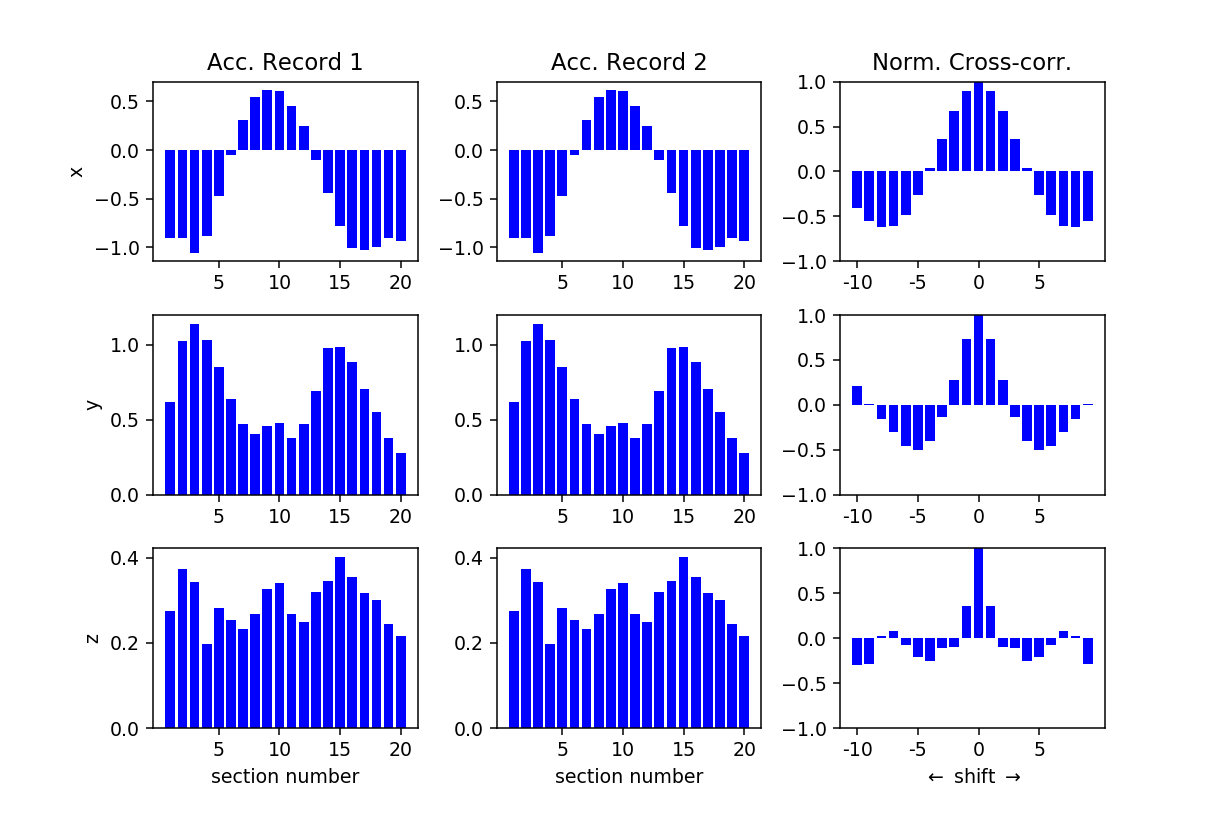

In [16]:
fig_acc, axs_acc = plt.subplots(3,3,figsize=(9,6), num='Acceleration [g]')
plt.subplots_adjust(top=0.9, hspace=0.3, wspace=0.3)

<IPython.core.display.Javascript object>


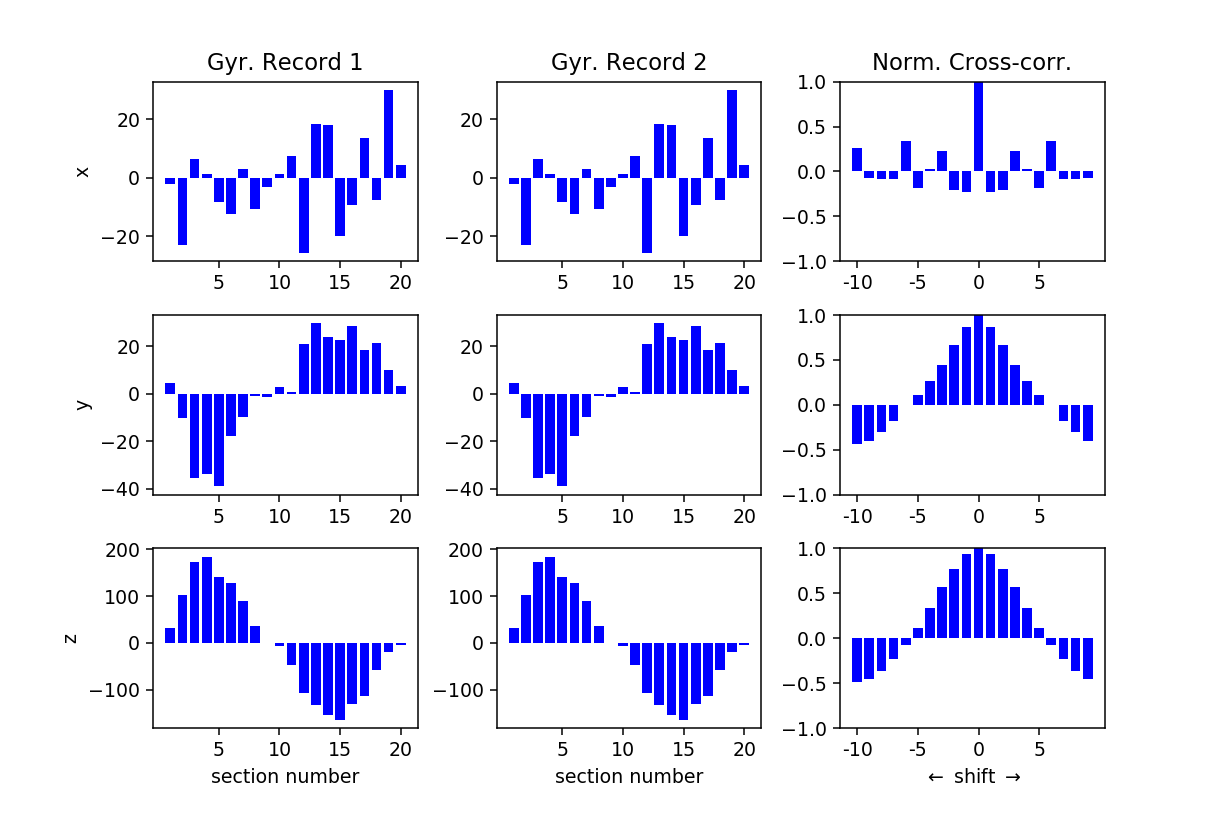

In [17]:
fig_gyr, axs_gyr = plt.subplots(3,3,figsize=(9,6), num='Angular Velocity [deg/s]')
plt.subplots_adjust(top=0.9, hspace=0.3, wspace=0.3)

<IPython.core.display.Javascript object>


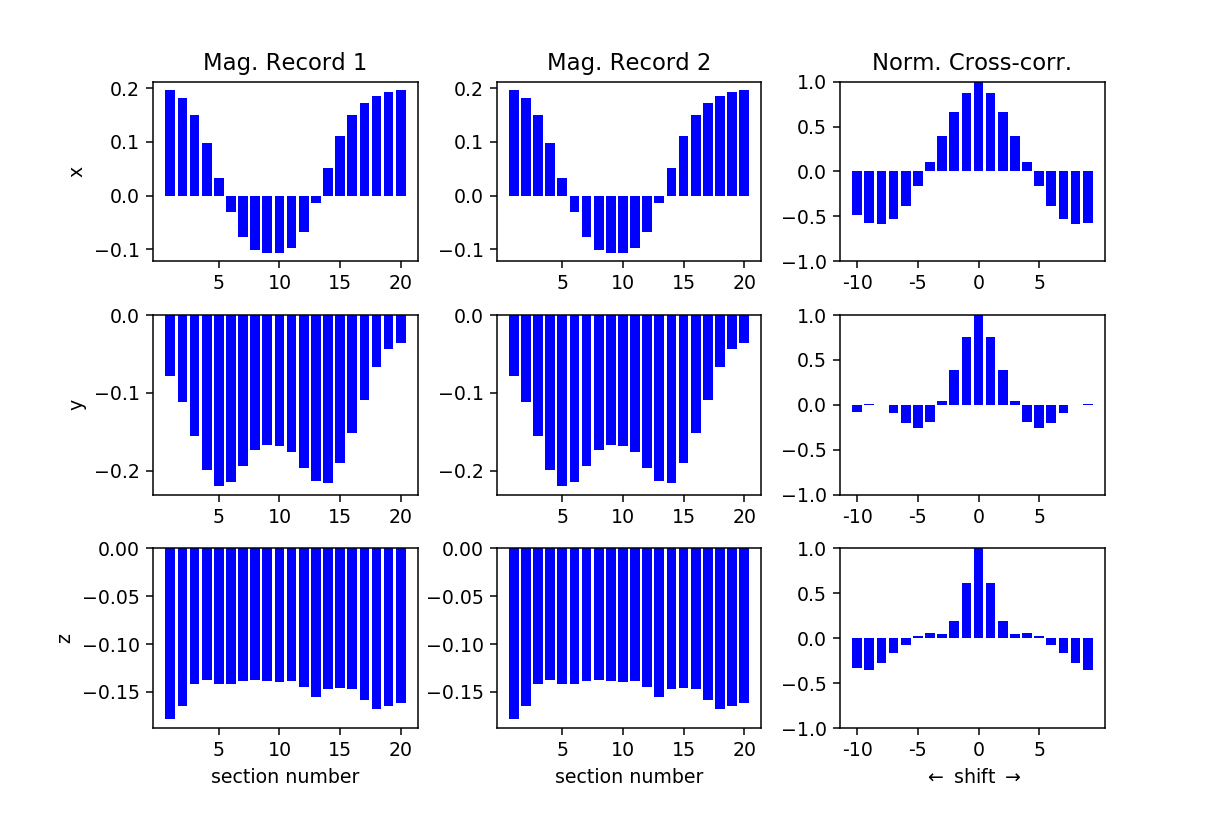

In [18]:
fig_mag, axs_mag = plt.subplots(3,3,figsize=(9,6), num='Magnetic Flux [G]')
plt.subplots_adjust(top=0.9, hspace=0.3, wspace=0.3)

In [19]:
plot_signals(0)